In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import pentzer2014icr as pentzer2014icr
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "R09"


In [3]:
preprocess(abbr, verbose=False)
icrdf = pentzer2014icr.pentzer2014icr(abbr, verbose=False)


R09: 100%|██████████| 1607/1607 [00:00<00:00, 3822.05it/s]
/home/norlab/code/202206/terrain-code/models/pentzer2014icr.py:206: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fdf.Bs = fdf.ICRyL - fdf.ICRyR
/home/norlab/code/202206/terrain-code/models/pentzer2014icr.py:207: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fdf.ICRyave = (fdf.ICRyL + fdf.ICRyR) / 2


In [4]:
icrdf.columns.values

array(['time', 'time_rel', 'vx', 'vy', 'vz', 'wz', 'current', 'voltage',
       'ax', 'ay', 'az', 'theta', 'phi', 'qw', 'qx', 'qy', 'qz', 'cmd_v',
       'cmd_w', 'wL', 'wR', 'px', 'py', 'pz', 'I_L', 'I_R', 'V_L', 'V_R',
       'lat', 'long', 'alt', 'ax_corr', 'ay_corr', 'az_corr', 'vL', 'vR',
       'cosp', 'sinp', 'py_ekf', 'px_ekf', 'phi_ekf', 'ICRyL', 'ICRyR',
       'ICRx'], dtype=object)

In [5]:
model_name = pentzer2014icr.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = pentzer2014icr.__MODEL_NAME__.title()

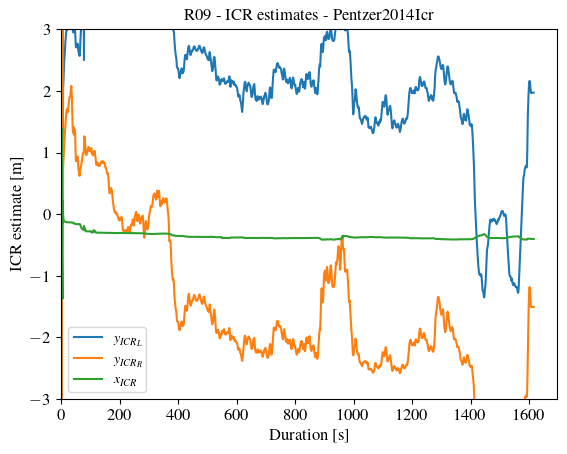

In [6]:
fig, ax = plt.subplots()
ax.plot(icrdf.time_rel, icrdf.ICRyL, label=r"$y_{{ICR}_{L}}$")
ax.plot(icrdf.time_rel, icrdf.ICRyR, label=r"$y_{{ICR}_{R}}$")
ax.plot(icrdf.time_rel, icrdf.ICRx, label=r"$x_{ICR}$")
ax.set_xlim(left=0)
ax.set_xlabel("Duration [s]")
ax.set_ylabel("ICR estimate [m]")
ax.legend()
ax.set_title(f"{abbr} - ICR estimates - {model_name}")
ax.set_ylim((-3, 3))

fig.savefig(figdir / f"{abbr}_ICR_estimates.jpg", bbox_inches="tight")

(-3.0, 3.0)

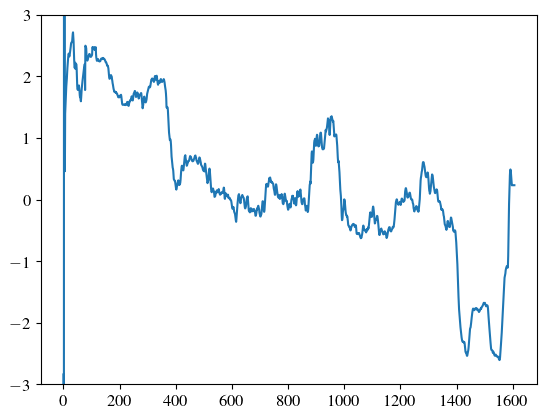

In [20]:
fig, ax = plt.subplots()
# icrdf.Bs.plot(ax=ax)
icrdf.ICRyave.plot(ax=ax)
ax.set_ylim((-3, 3))


In [8]:
bstail = icrdf.Bs[20:30].tail(n=20)
bstail.plot(ylim=(1,3), xlim=(0,100))
bstail.tail()

25    1.318595
26    1.310585
27    1.299948
28    1.292353
29    1.290680
dtype: float64

In [9]:
icrdf.time_rel.tail()

1602    1611.578314
1603    1612.582709
1604    1613.590869
1605    1614.594619
1606    1615.602864
Name: time_rel, dtype: float64

In [10]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(8,4))

ax1.plot(icrdf.px, icrdf.py, label="Measured")
ax1.plot(icrdf.px_ekf, icrdf.py_ekf, label="EKF")
ax1.legend()

ax2.plot(icrdf.time_rel, icrdf.phi, label="Measured")
ax2.plot(icrdf.time_rel, icrdf.phi_ekf, label="EKF")
ax2.legend()

In [11]:
icrdf[["px", "py", "pz", "phi", "vL", "vR"]].head()

px        py        pz       phi        vL        vR
0  0.085611  0.064322  0.008205  0.631188  0.703586  1.378701
1  0.573615  0.492161  0.049701  0.745853  1.327977  1.363648
2  1.208590  1.061203  0.061371  0.703829  1.602212  1.288707
3  1.940026  1.609667  0.060847  0.561122  1.784817  1.079922
4  2.755650  2.001403  0.075786  0.324382  1.803798  1.098903

In [12]:
import numpy as np
np.cos(icrdf.phi)

0       0.807327
1       0.734509
2       0.762370
3       0.846659
4       0.947848
          ...   
1602   -0.764047
1603   -0.776088
1604   -0.785626
1605   -0.794139
1606   -0.795158
Name: phi, Length: 1607, dtype: float64

In [13]:
icrdf[["ICRyL", "ICRyR", "ICRx"]].tail(20)

ICRyL     ICRyR      ICRx
1587  1.771854 -1.920012 -0.398362
1588  1.902139 -1.698015 -0.397473
1589  2.010452 -1.476115 -0.397836
1590  2.107264 -1.323288 -0.396708
1591  2.156921 -1.202454 -0.396064
1592  2.162642 -1.182896 -0.395637
1593  2.153392 -1.200875 -0.395954
1594  2.109800 -1.292063 -0.397679
1595  2.054766 -1.383905 -0.400618
1596  1.990898 -1.484534 -0.402332
1597  1.967310 -1.502293 -0.403396
1598  1.973769 -1.498008 -0.402851
1599  1.976798 -1.501371 -0.402310
1600  1.973919 -1.505852 -0.402160
1601  1.973419 -1.506358 -0.402116
1602  1.973563 -1.506486 -0.401939
1603  1.973667 -1.506307 -0.401778
1604  1.973711 -1.505953 -0.401727
1605  1.973759 -1.505758 -0.401652
1606  1.973755 -1.505758 -0.401652

In [14]:
print(icrdf.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'wz' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'phi' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py'
 'pz' 'I_L' 'I_R' 'V_L' 'V_R' 'lat' 'long' 'alt' 'ax_corr' 'ay_corr'
 'az_corr' 'vL' 'vR' 'cosp' 'sinp' 'py_ekf' 'px_ekf' 'phi_ekf' 'ICRyL'
 'ICRyR' 'ICRx']
